In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

df=pd.read_csv(".\\Airbnb listings in Ottawa (May 2016).csv")


df.head()

,id,room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,0,25468,106030,Private room,NaN,BEACON HILL-CYRVILLE,8,4.5,2,1.0,NaN,29.0,2.0,45.450053,-75.589091,2016-05-16 23:47:32.757633
1,1,34220,147438,Private room,NaN,CAPITAL,0,NaN,2,1.0,1.0,161.0,7.0,45.409237,-75.678999,2016-05-16 23:14:17.559013
2,2,36642,157787,Private room,NaN,KITCHISSIPPI,60,4.5,2,1.0,NaN,56.0,1.0,45.401591,-75.746794,2016-05-16 23:12:51.307224
3,3,42100,184023,Private room,NaN,GLOUCESTER-SOUTH NEPEAN,0,NaN,1,1.0,2.0,31.0,1.0,45.320071,-75.607080,2016-05-16 22:58:04.288813
4,4,59258,284351,Entire home/apt,NaN,BAY,1,NaN,4,1.0,1.0,128.0,3.0,45.358996,-75.803144,2016-05-17 00:11:06.877538


In [3]:
df.describe()

,id,room_id,host_id,borough,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude
count,1496.000000,1.496000e+03,1.496000e+03,0.0,1496.000000,738.000000,1496.000000,1495.000000,1165.000000,1496.000000,1436.000000,1496.000000,1496.000000
mean,747.500000,7.701265e+06,2.718194e+07,NaN,11.140374,4.668022,3.064171,1.369231,1.205150,79.560829,2.213092,45.394457,-75.702587
std,432.002315,3.637372e+06,1.996579e+07,NaN,22.427595,0.412928,2.041024,0.910369,0.534038,192.280172,3.360645,0.052223,0.086575
min,0.000000,2.546800e+04,1.296900e+04,NaN,0.000000,2.500000,1.000000,0.000000,0.000000,14.000000,1.000000,45.098941,-76.252372
25%,373.750000,5.056012e+06,9.095685e+06,NaN,0.000000,4.500000,2.000000,1.000000,1.000000,40.000000,1.000000,45.372978,-75.726438
50%,747.500000,7.940859e+06,2.541657e+07,NaN,2.000000,4.500000,2.000000,1.000000,1.000000,60.000000,1.000000,45.410409,-75.691830
75%,1121.250000,1.099858e+07,4.095757e+07,NaN,12.000000,5.000000,4.000000,2.000000,1.000000,88.000000,2.000000,45.427816,-75.674193
max,1495.000000,1.304757e+07,7.217795e+07,NaN,281.000000,5.000000,16.000000,10.000000,8.000000,6950.000000,90.000000,45.514999,-75.373394


In [4]:
df3d = df[['longitude','latitude','accommodates']].values

C:\Users\patry\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


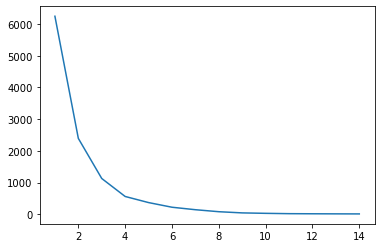

In [5]:
WCSS=[]
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df3d)
    WCSS.append(kmeans.inertia_)

plt.plot(range(1,15),WCSS)

C:\Users\patry\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

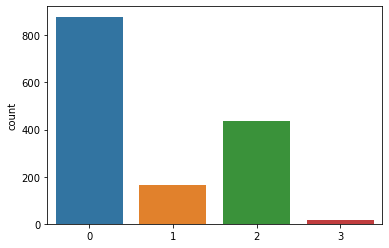

In [6]:
kmeans = KMeans(n_clusters=4, max_iter=300, random_state=1)
clusters =kmeans.fit_predict(df3d)
centroids = kmeans.cluster_centers_

sns.countplot(clusters)


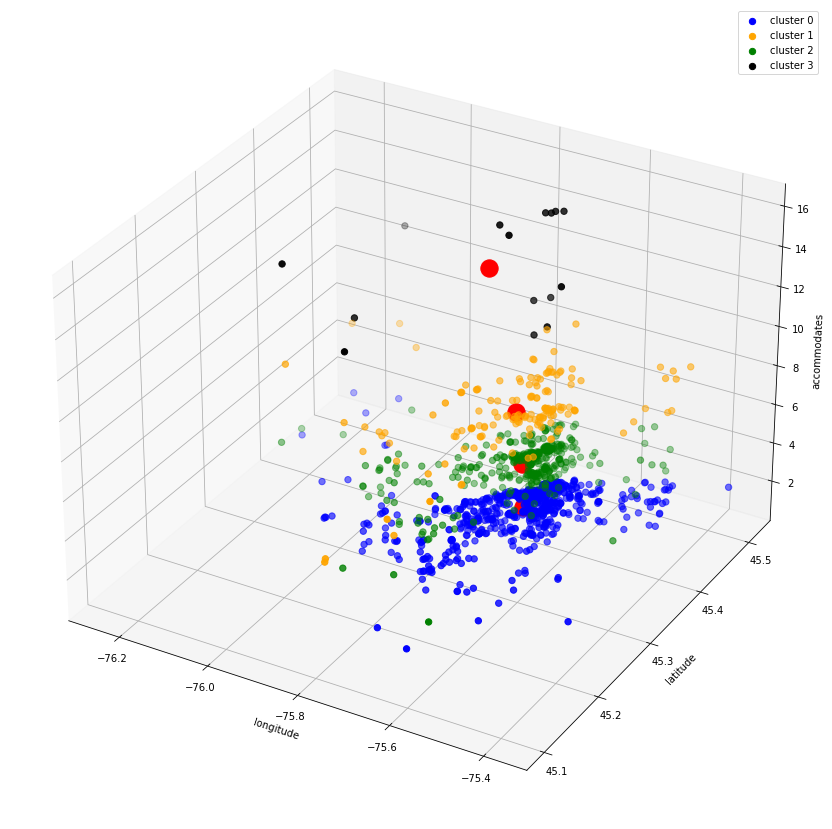

In [37]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(centroids[0][0], centroids[0][1], centroids[0][2], s = 300 , color = 'red')
ax.scatter(centroids[1][0], centroids[1][1], centroids[1][2], s = 300 , color = 'red')
ax.scatter(centroids[2][0], centroids[2][1], centroids[2][2], s = 300 , color = 'red')
ax.scatter(centroids[3][0], centroids[3][1], centroids[3][2], s = 300 , color = 'red')
ax.scatter(df3d[clusters == 0,0],df3d[clusters == 0,1],df3d[clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(df3d[clusters == 1,0],df3d[clusters == 1,1],df3d[clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(df3d[clusters == 2,0],df3d[clusters == 2,1],df3d[clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(df3d[clusters == 3,0],df3d[clusters == 3,1],df3d[clusters == 3,2], s = 40 , color = 'black', label = "cluster 3")


ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('accommodates')
ax.legend()
plt.show()